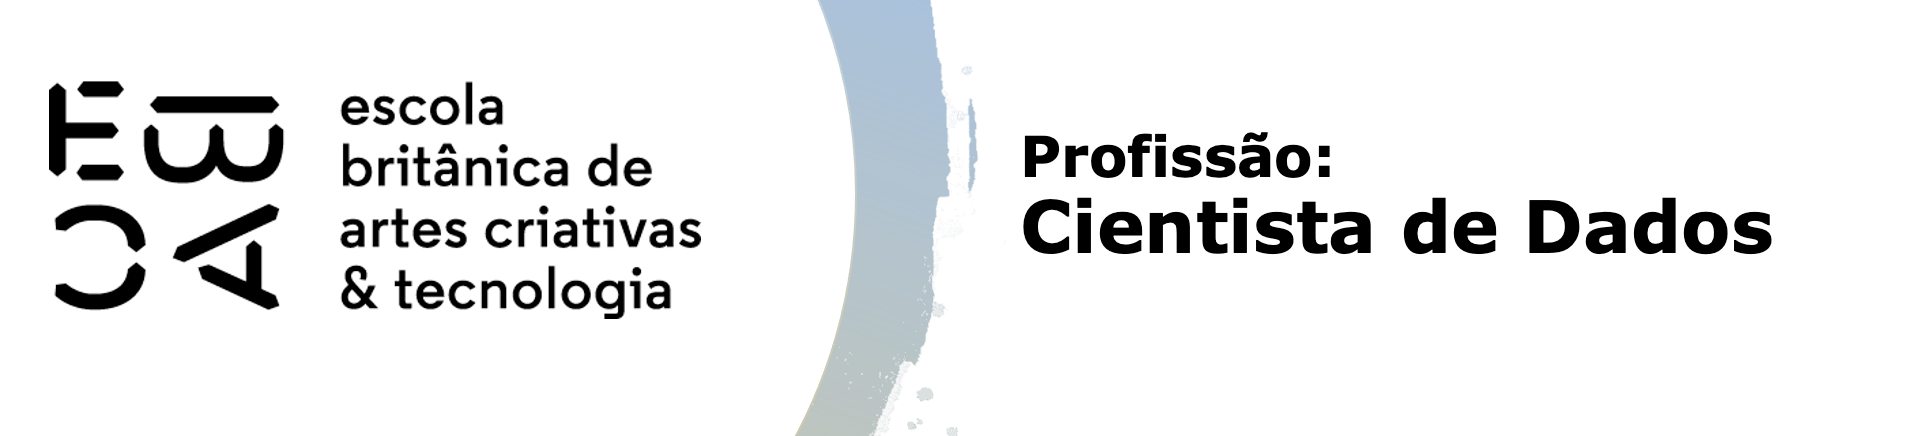

# Tarefa

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [8]:
pg = sns.load_dataset('penguins')

In [9]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

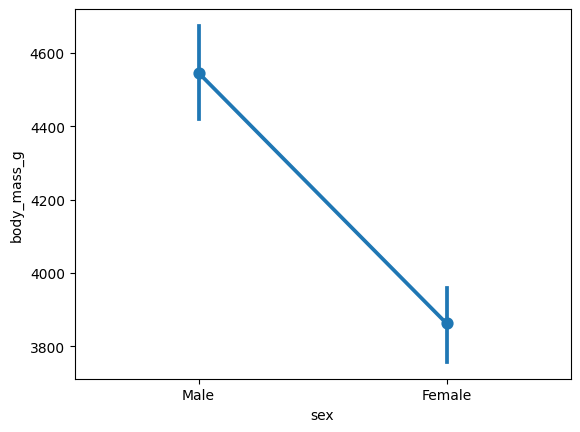

In [10]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [13]:
# Calcular a estatística descritiva do peso corporal por sexo
desc_stats = pg.groupby('sex')['body_mass_g'].describe()
desc_stats

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


In [14]:
# Realizar o teste t de duas amostras para verificar se há diferença significativa entre os pesos dos machos e das fêmeas
male_weights = pg[pg['sex'] == 'Male']['body_mass_g']
female_weights = pg[pg['sex'] == 'Female']['body_mass_g']
t_stat, p_value = stats.ttest_ind(male_weights, female_weights, equal_var=False)

# Mostrar resultados
t_stat, p_value, desc_stats

(8.554537231165762,
 4.793891255051457e-16,
         count         mean         std     min     25%     50%     75%     max
 sex                                                                           
 Female  165.0  3862.272727  666.172050  2700.0  3350.0  3650.0  4550.0  5200.0
 Male    168.0  4545.684524  787.628884  3250.0  3900.0  4300.0  5312.5  6300.0)

Após realizar um teste t de duas amostras, verificamos que há uma diferença significativa entre os pesos de machos e fêmeas na amostra de pinguins analisada. A estatística t obtida foi aproximadamente 8,55 e o valor-p foi extremamente baixo, cerca de 4,79e-16, muito menor que o nível de significância de 5% (0,05).

Conclusão: Dado que o valor-p é muito inferior ao nível de significância de 5%, rejeitamos a hipótese nula de que não há diferença nos pesos médios entre machos e fêmeas. Portanto, podemos concluir que existe uma diferença estatisticamente significativa nos pesos médios de machos e fêmeas, e essa conclusão é extrapolável para toda a população de pinguins, assumindo que a amostra é representativa da população.

Isso significa que, com alto grau de confiança, podemos afirmar que, em média, os pinguins machos tendem a ser mais pesados que as fêmeas.

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

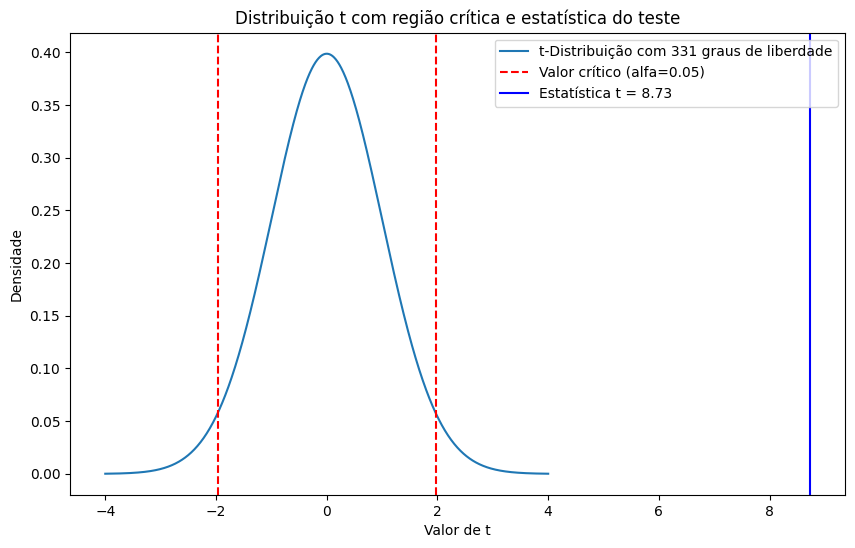

In [18]:
# Simulando pesos de pinguins machos e fêmeas
np.random.seed(42)
male_weights = np.random.normal(4500, 700, 168)
female_weights = np.random.normal(3800, 650, 165)

# Realizar o teste t
t_stat, p_value = stats.ttest_ind(male_weights, female_weights, equal_var=False)

# Definir os parâmetros para a distribuição t
df = len(male_weights) + len(female_weights) - 2  # graus de liberdade
x = np.linspace(-4, 4, 1000)
t_dist = stats.t.pdf(x, df)

# Plotar a distribuição t
plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label=f't-Distribuição com {df} graus de liberdade')

# Marcar a região crítica para um teste bicaudal com alfa = 0.05
crit_value = stats.t.ppf(1 - 0.025, df)
plt.axvline(x=crit_value, color='red', linestyle='--', label='Valor crítico (alfa=0.05)')
plt.axvline(x=-crit_value, color='red', linestyle='--')

# Marcar o valor da estatística t calculada
plt.axvline(x=t_stat, color='blue', linestyle='-', label=f'Estatística t = {t_stat:.2f}')

# Adicionar labels e título
plt.title('Distribuição t com região crítica e estatística do teste')
plt.xlabel('Valor de t')

plt.ylabel('Densidade')
plt.legend()
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [20]:
# Listar as espécies
species_list = pg['species'].unique()

# Inicializar um dicionário para armazenar os resultados dos testes
p_values = {}

# Realizar o teste t para cada espécie separadamente
for species in species_list:
    male_weights = pg[(pg['sex'] == 'Male') & (pg['species'] == species)]['body_mass_g']
    female_weights = pg[(pg['sex'] == 'Female') & (pg['species'] == species)]['body_mass_g']
    t_stat, p_value = stats.ttest_ind(male_weights, female_weights, equal_var=False)
    p_values[species] = p_value

p_values

{'Adelie': 6.402319748031793e-26,
 'Chinstrap': 2.2644315514651406e-06,
 'Gentoo': 1.8677596749117468e-28}

Os valores-p obtidos para todas as espécies são muito menores que o nível de significância usual de 0,05. Isso significa que, para cada uma das três espécies de pinguins (Adelie, Chinstrap e Gentoo), existe uma diferença estatisticamente significativa no peso corporal entre machos e fêmeas. Portanto, podemos concluir que as diferenças observadas na amostra são extrapoláveis para as populações dessas espécies.